In [5]:
import myfunctions as mf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [14]:
OS = 'MacOS_SSD'
P28A = mf.load_dfs('P28A_FT_H_Exp2', OS)[0]
VCT5A = mf.load_dfs('VCT5A_FT_H_Exp5', OS)[0]
unique_t = np.unique(P28A['t'])
filt = P28A['t'] == unique_t[-1]
P28A_V = P28A.loc[filt]['V'].values
unique_t = np.unique(VCT5A['t'])
filt = VCT5A['t'] == unique_t[-1]
VCT5A_V = VCT5A.loc[filt]['V'].values
P28A_shapiro_stat, P28A_shapiro_pvalue = stats.shapiro(P28A_V)
VCT5A_shapiro_stat, VCT5A_shapiro_pvalue = stats.shapiro(VCT5A_V)
anova_fstat, anova_pvalue = stats.f_oneway(P28A_V, VCT5A_V)
welch_tstat, welch_pvalue = stats.ttest_ind(P28A_V, VCT5A_V, equal_var=False)


Oneway ANOVA test makes the following assumptions about the probability distributions of the responses:
- Independence of observations;
- Normality
- Homoscedasticity (equality of variances)

In our case the second and third assumptions are not valid:

- Shapiro wilk p-value for both VCT5A and P28A is equal to zero (data is not normally distributed for both experiments)
- `VCT5A_std > 2*P28A_std` (we cannot assume same variances)
This means that Oneway ANOVA test validity is not guaranteed.

Welch's t-test, or unequal variances t-test, is used to test the (null) hypothesis that two populations have equal means. It is designed for unequal population variances, but the assumption of normality is maintained. Yet, Welch's t-test is considered robust to violations of this assumption, especially when sample sizes are large. p-value is in the order of $10^{-17}$ in this case, so we can state that the mean of the two populations is different with statistical certainty.

In [15]:
print(f'P28A mean: {np.mean(P28A_V):.3f}, std: {np.std(P28A_V):.3f}')
print(f'VCT5A mean: {np.mean(VCT5A_V):.3f}, std: {np.std(VCT5A_V):.3f}')
print(f'P28A_shapiro_stat: {P28A_shapiro_stat:e}')
print(f'P28A_shapiro_pvalue: {P28A_shapiro_pvalue:e}')
print(f'VCT5A_shapiro_stat: {VCT5A_shapiro_stat:e}')
print(f'VCT5A_shapiro_pvalue: {VCT5A_shapiro_pvalue:e}')
print(f'anova_fstat: {anova_fstat:e}, anova_pvalue: {anova_pvalue:e}')
print(f'welch_tstat: {welch_tstat:e}, welch_pvalue: {welch_pvalue:e}')

P28A mean: 0.025, std: 0.039
VCT5A mean: 0.065, std: 0.149
P28A_shapiro_stat: 4.938638e-01
P28A_shapiro_pvalue: 0.000000e+00
VCT5A_shapiro_stat: 4.156733e-01
VCT5A_shapiro_pvalue: 0.000000e+00
anova_fstat: 1.278450e+02, anova_pvalue: 4.631173e-29
welch_tstat: -8.656700e+00, welch_pvalue: 1.640361e-17


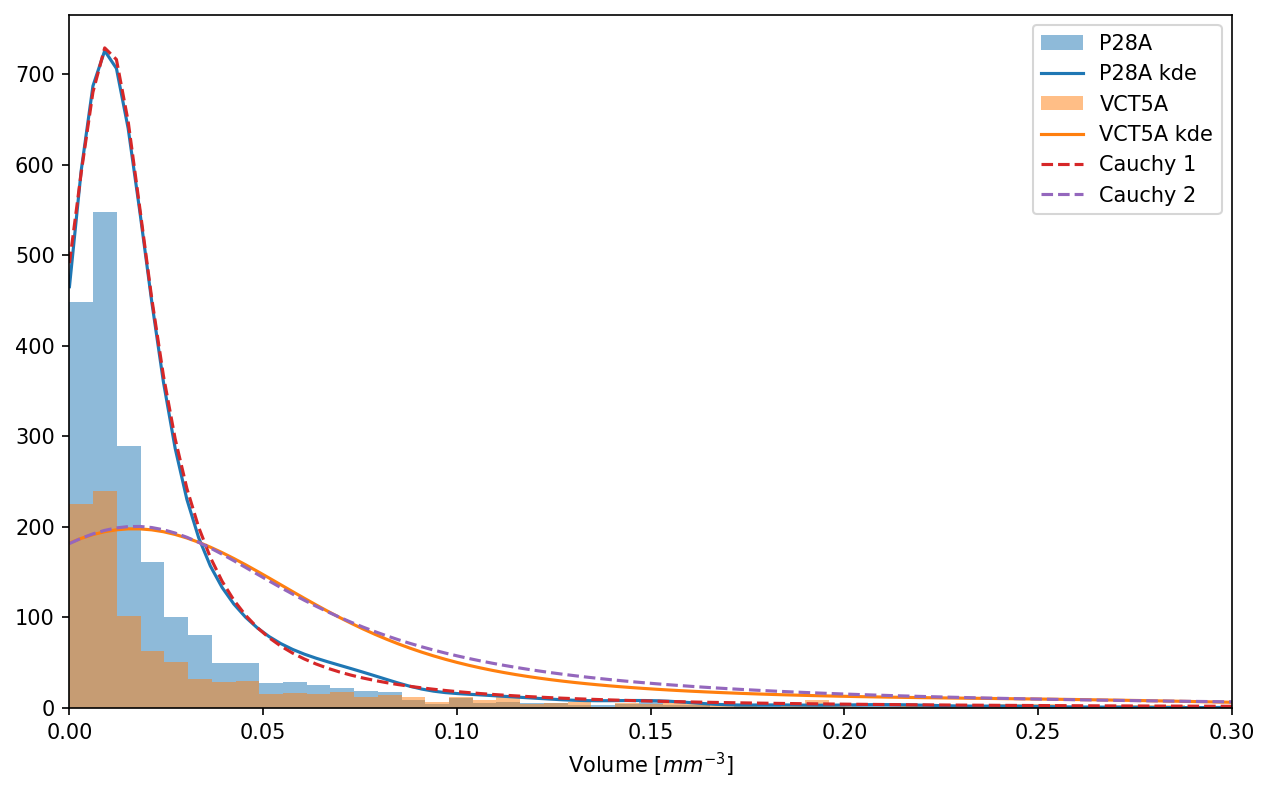

In [60]:
xlim = 0.3
kde_factor = 25
bins = np.linspace(0, xlim, 50)
xx = np.linspace(0, xlim, 100)
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

ax.hist(P28A_V, bins=bins, alpha=0.5, label='P28A')
kde_P28A = stats.gaussian_kde(P28A_V)
ax.plot(xx, kde_P28A(xx)*kde_factor, label='P28A kde', color=sns.color_palette()[0])

ax.hist(VCT5A_V, bins=bins, alpha=0.5, label='VCT5A')
kde_VCT5A = stats.gaussian_kde(VCT5A_V)
ax.plot(xx, kde_VCT5A(xx)*kde_factor, label='VCT5A kde', color=sns.color_palette()[1])

# ax.plot(xx, norm.pdf(xx, 0.02, 0.05)*20, label='Gaussian', color=sns.color_palette()[2], linestyle='--')
ax.plot(xx, stats.cauchy.pdf((xx-0.01)*70)*2300, label='Cauchy 1', color=sns.color_palette()[3], linestyle='--')
ax.plot(xx, stats.cauchy.pdf((xx-0.017)*19)*630, label='Cauchy 2', color=sns.color_palette()[4], linestyle='--')

ax.set_xlim(0, xlim)
ax.set_xlabel('Volume [$mm^{-3}$]')
_ = ax.legend()